# Comparing attractors

This notebook shows how to generate time series embeddings using a variety of techniques

### Import dependencies

In [1]:
import numpy as np

## Import from local directory
import sys
sys.path.insert(0, './fnn')
from models import LSTMEmbedding, MLPEmbedding, ETDEmbedding, AMIEmbedding, TICAEmbedding
from regularizers import FNN

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['lines.linewidth'] = .02
plt.rcParams['axes.prop_cycle'] = plt.cycler(color="k") 
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/william/miniconda3/envs/nn2/lib/python3.6/site-packages/tensorflow_addons/utils/ensure_tf_install.py:44: UserWarning: You are currently using a nightly version of TensorFlow (2.4.0-dev20200804). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  UserWarning,


### Generate example dataset

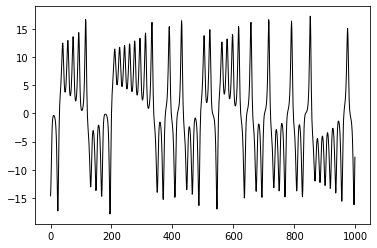

In [2]:
sol = np.loadtxt('datasets/lorenz.csv.gz', delimiter=',')
sol = sol[:, ::10]
obs = sol[0, :5000] # only first coordinate is observable

plt.plot(sol[0, -1000:], linewidth=1)

### Create embeddings using several different models

In [39]:
# LSTM
lstm_model = LSTMEmbedding(10, 
                     time_window=10, 
                     latent_regularizer=FNN(10),
                     random_state=0
                     )
coords_lstm = lstm_model.fit_transform(obs)
print("LSTM complete")

# MLP
mlp_model = MLPEmbedding(10, 
                     time_window=10, 
                     latent_regularizer=FNN(10), 
                     random_state=0
                     )
coords_mlp = mlp_model.fit_transform(obs, learning_rate=2e-4)
print("MLP complete")

# ICA
ica_model = TICAEmbedding(10, time_window=10, time_lag=0)
coords_ica = ica_model.fit_transform(obs)
print("ICA complete")

# tICA
tica_model = TICAEmbedding(10, time_window=10, time_lag=10)
coords_tica = tica_model.fit_transform(obs)
print("tICA complete")

# EigenDelay
etd_model = ETDEmbedding(10, time_window=10)
coords_etd = etd_model.fit_transform(obs)
print("ETD complete")

# Average Mutual Information
ami_model = AMIEmbedding(10, lag_cutoff=15)
coords_ami = ami_model.fit_transform(obs)
print("AMI complete")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
LSTM complete
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filin

### Visualize different embedding methods

<Figure size 432x288 with 0 Axes>

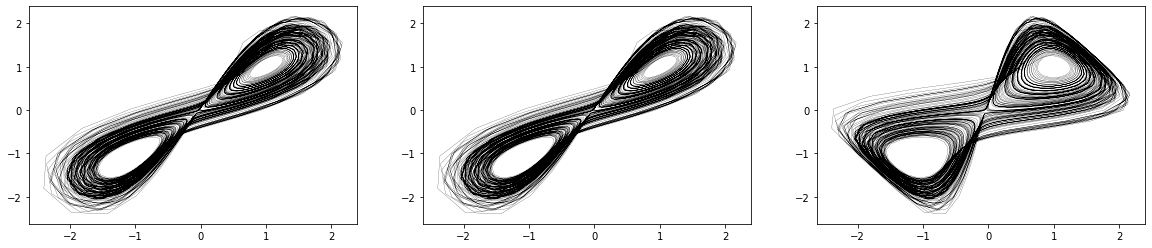

<Figure size 432x288 with 0 Axes>

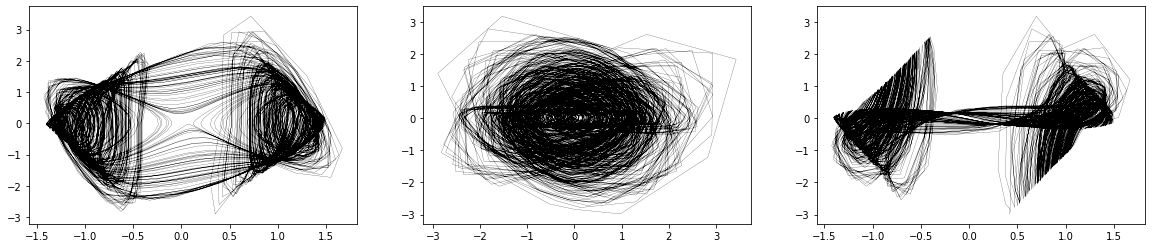

<Figure size 432x288 with 0 Axes>

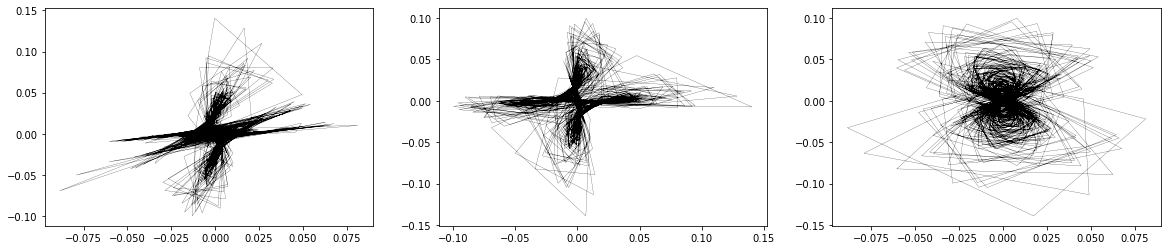

<Figure size 432x288 with 0 Axes>

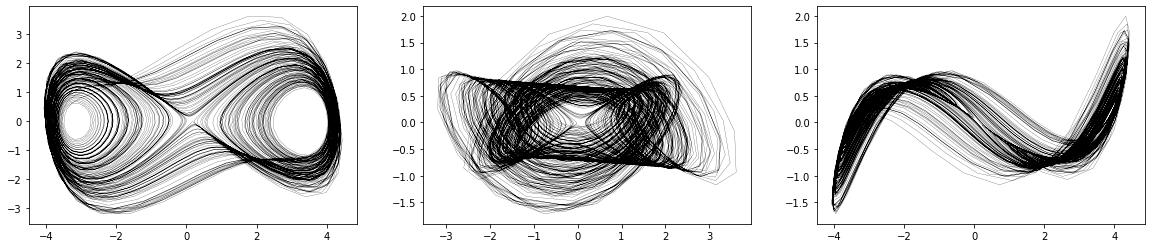

<Figure size 432x288 with 0 Axes>

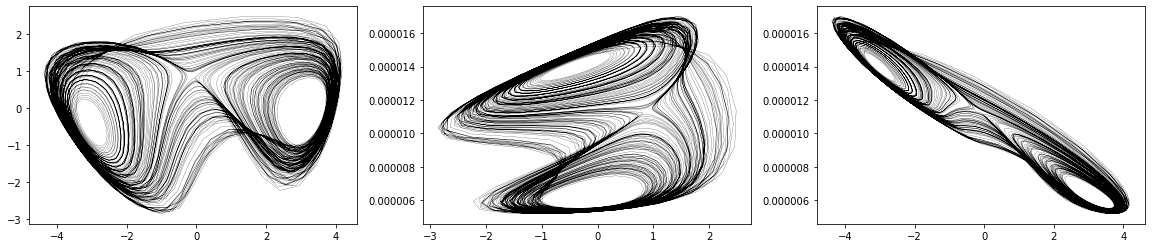

<Figure size 432x288 with 0 Axes>

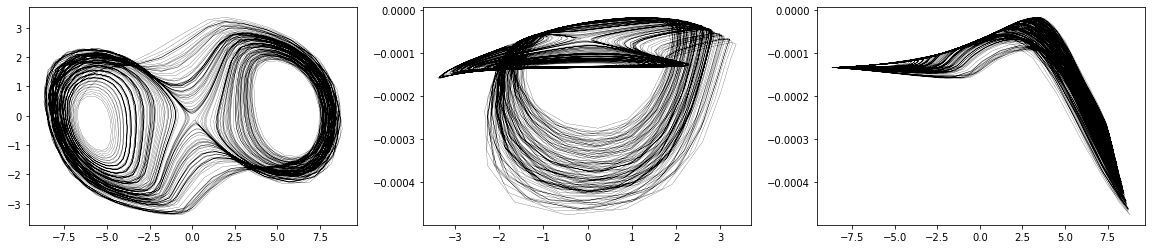

In [42]:


plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_ami[:,0], coords_ami[:,1], 'k', linewidth=.2)
ax[1].plot(coords_ami[:,1], coords_ami[:,2], 'k', linewidth=.2)
ax[2].plot(coords_ami[:,0], coords_ami[:,2], 'k', linewidth=.2)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_tica[:,0], coords_tica[:,1], 'k', linewidth=.2)
ax[1].plot(coords_tica[:,1], coords_tica[:,2], 'k', linewidth=.2)
ax[2].plot(coords_tica[:,0], coords_tica[:,2], 'k', linewidth=.2)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_ica[:,0], coords_ica[:,1], 'k', linewidth=.2)
ax[1].plot(coords_ica[:,1], coords_ica[:,2], 'k', linewidth=.2)
ax[2].plot(coords_ica[:,0], coords_ica[:,2], 'k', linewidth=.2)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_etd[:,0], coords_etd[:,1], 'k', linewidth=.2)
ax[1].plot(coords_etd[:,1], coords_etd[:,2], 'k', linewidth=.2)
ax[2].plot(coords_etd[:,0], coords_etd[:,2], 'k', linewidth=.2)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_mlp[:,0], coords_mlp[:,1], 'k', linewidth=.2)
ax[1].plot(coords_mlp[:,1], coords_mlp[:,2], 'k', linewidth=.2)
ax[2].plot(coords_mlp[:,0], coords_mlp[:,2], 'k', linewidth=.2)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_lstm[:,0], coords_lstm[:,1], 'k', linewidth=.2)
ax[1].plot(coords_lstm[:,1], coords_lstm[:,2], 'k', linewidth=.2)
ax[2].plot(coords_lstm[:,0], coords_lstm[:,2], 'k', linewidth=.2)